In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Set a classic serif font and adjust global styling for academic appearance
mpl.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'axes.edgecolor': 'black',
    'axes.linewidth': 1.0,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.minor.size': 2.5,
    'ytick.minor.size': 2.5,
    'xtick.major.width': 1,
    'ytick.major.width': 1,
    'figure.dpi': 300,  # High resolution for publication
    'savefig.dpi': 300
})

In [3]:
df = pd.read_json("results.jsonl", lines=True)
print(len(df))
df.head()

432


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,a79e2e2e2f87d61be25d89e4e3840abb8383b409,fluky-tils,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,1.5,ccot/excellent-format-thought.txt,cq.txt,auto/ccot.json,...,90,79,53.924051,19.161776,27,41.0,49.0,64.0,103,ccot
1,0b55c81305c470354bc75d13477dcd08a82f52cf,joint-buhl,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,2.0,ccot/excellent-format-thought.txt,cq.txt,auto/ccot.json,...,84,228,104.907895,19.126413,0,102.0,108.0,114.0,151,ccot
2,832e23107a694cf30e7d73bde1f096ce63c121f1,lamer-choc,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,ccot/format-thought.txt,cq.txt,auto/ccot.json,...,93,77,56.168831,19.699988,21,39.0,52.0,70.0,99,ccot
3,5041006f00ec1d0ac8d4fd65cdd76145733f22b7,jumpy-yegg,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,1.5,ccot/format-thought.txt,cq.txt,auto/ccot.json,...,95,81,59.604938,21.431682,26,41.0,58.0,76.0,107,ccot
4,13c6888043ddd6633df48d7b8630dba003dd4c56,ruled-ruin,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.7,ccot/excellent-format-thought.txt,cq.txt,auto/ccot.json,...,95,71,54.845070,18.121532,24,41.0,51.0,67.5,98,ccot


In [4]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [5]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.user_prompt_template",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,lucky-veil,0.1,ccot/excellent-format-thought.txt,cq.txt,auto/ccot.json,0,1,0.646667,0.739779,0.73,...,100,80,52.575000,15.572432,26,43.00,49.0,62.0,98,ccot
1,reeky-orcs,0.1,ccot/excellent-format-thought.txt,cq.txt,auto/ccot.json,0,2,0.633333,0.742517,0.71,...,99,79,54.962025,18.533022,24,43.00,50.0,65.5,100,ccot
2,elite-bolo,0.1,ccot/excellent-format-thought.txt,cq.txt,auto/ccot.json,0,3,0.643333,0.744104,0.73,...,99,79,55.531646,18.243253,27,43.00,50.0,67.5,100,ccot
3,spiny-kaka,0.5,ccot/excellent-format-thought.txt,cq.txt,auto/ccot.json,0,1,0.620000,0.727099,0.70,...,97,84,55.797619,16.554241,26,43.75,52.5,65.0,98,ccot
4,coxal-vase,0.5,ccot/excellent-format-thought.txt,cq.txt,auto/ccot.json,0,2,0.613333,0.725788,0.72,...,89,85,54.741176,16.537226,24,44.00,50.0,65.0,99,ccot


In [6]:
# find the rows with max f1 score for each technique group
avg_df = df.groupby(target_param_cols)[metric_cols].mean().reset_index()
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
97,cte,cte/excellent-format-triplets-few.txt,cq.txt,auto/cte.json,6,0.5,0.698889,0.789375,0.760000,0.852405,...,51.250000,94.333333,62.333333,48.366701,15.021856,26.0,37.666667,45.333333,57.00,98.000000
67,ccot,ccot/format-thought.txt,cq.txt,auto/ccot.json,9,0.5,0.678889,0.778162,0.746667,0.836723,...,52.583333,88.666667,66.666667,51.362789,16.337178,27.0,38.916667,47.500000,61.75,97.333333


In [7]:
# Extract and prepare the data
efficiency_metrics = [
    "metrics.gen_token_count.success.mean",
    "metrics.gen_token_count.success.std",
    "metrics.gen_token_count.success.min",
    "metrics.gen_token_count.success.max",
]
data = best_df[["params.qa.technique"] + efficiency_metrics].copy()
data.columns = ["Technique", "Mean Tokens", "Std Tokens", "Min Tokens", "Max Tokens"]
data['Technique'] = data['Technique'].map(lambda x: x.capitalize() if x == 'direct' else x.upper())

# Identify the mean for the "Direct" technique
lower_bound = data.loc[data["Technique"] == "Direct", "Mean Tokens"].values[0]

# Compute the multiplication factor relative to Direct
data["Relative Verbosity Ratio"] = data["Mean Tokens"] / lower_bound

# Sort techniques by RVR
data.sort_values("Relative Verbosity Ratio", inplace=True)
data

IndexError: index 0 is out of bounds for axis 0 with size 0

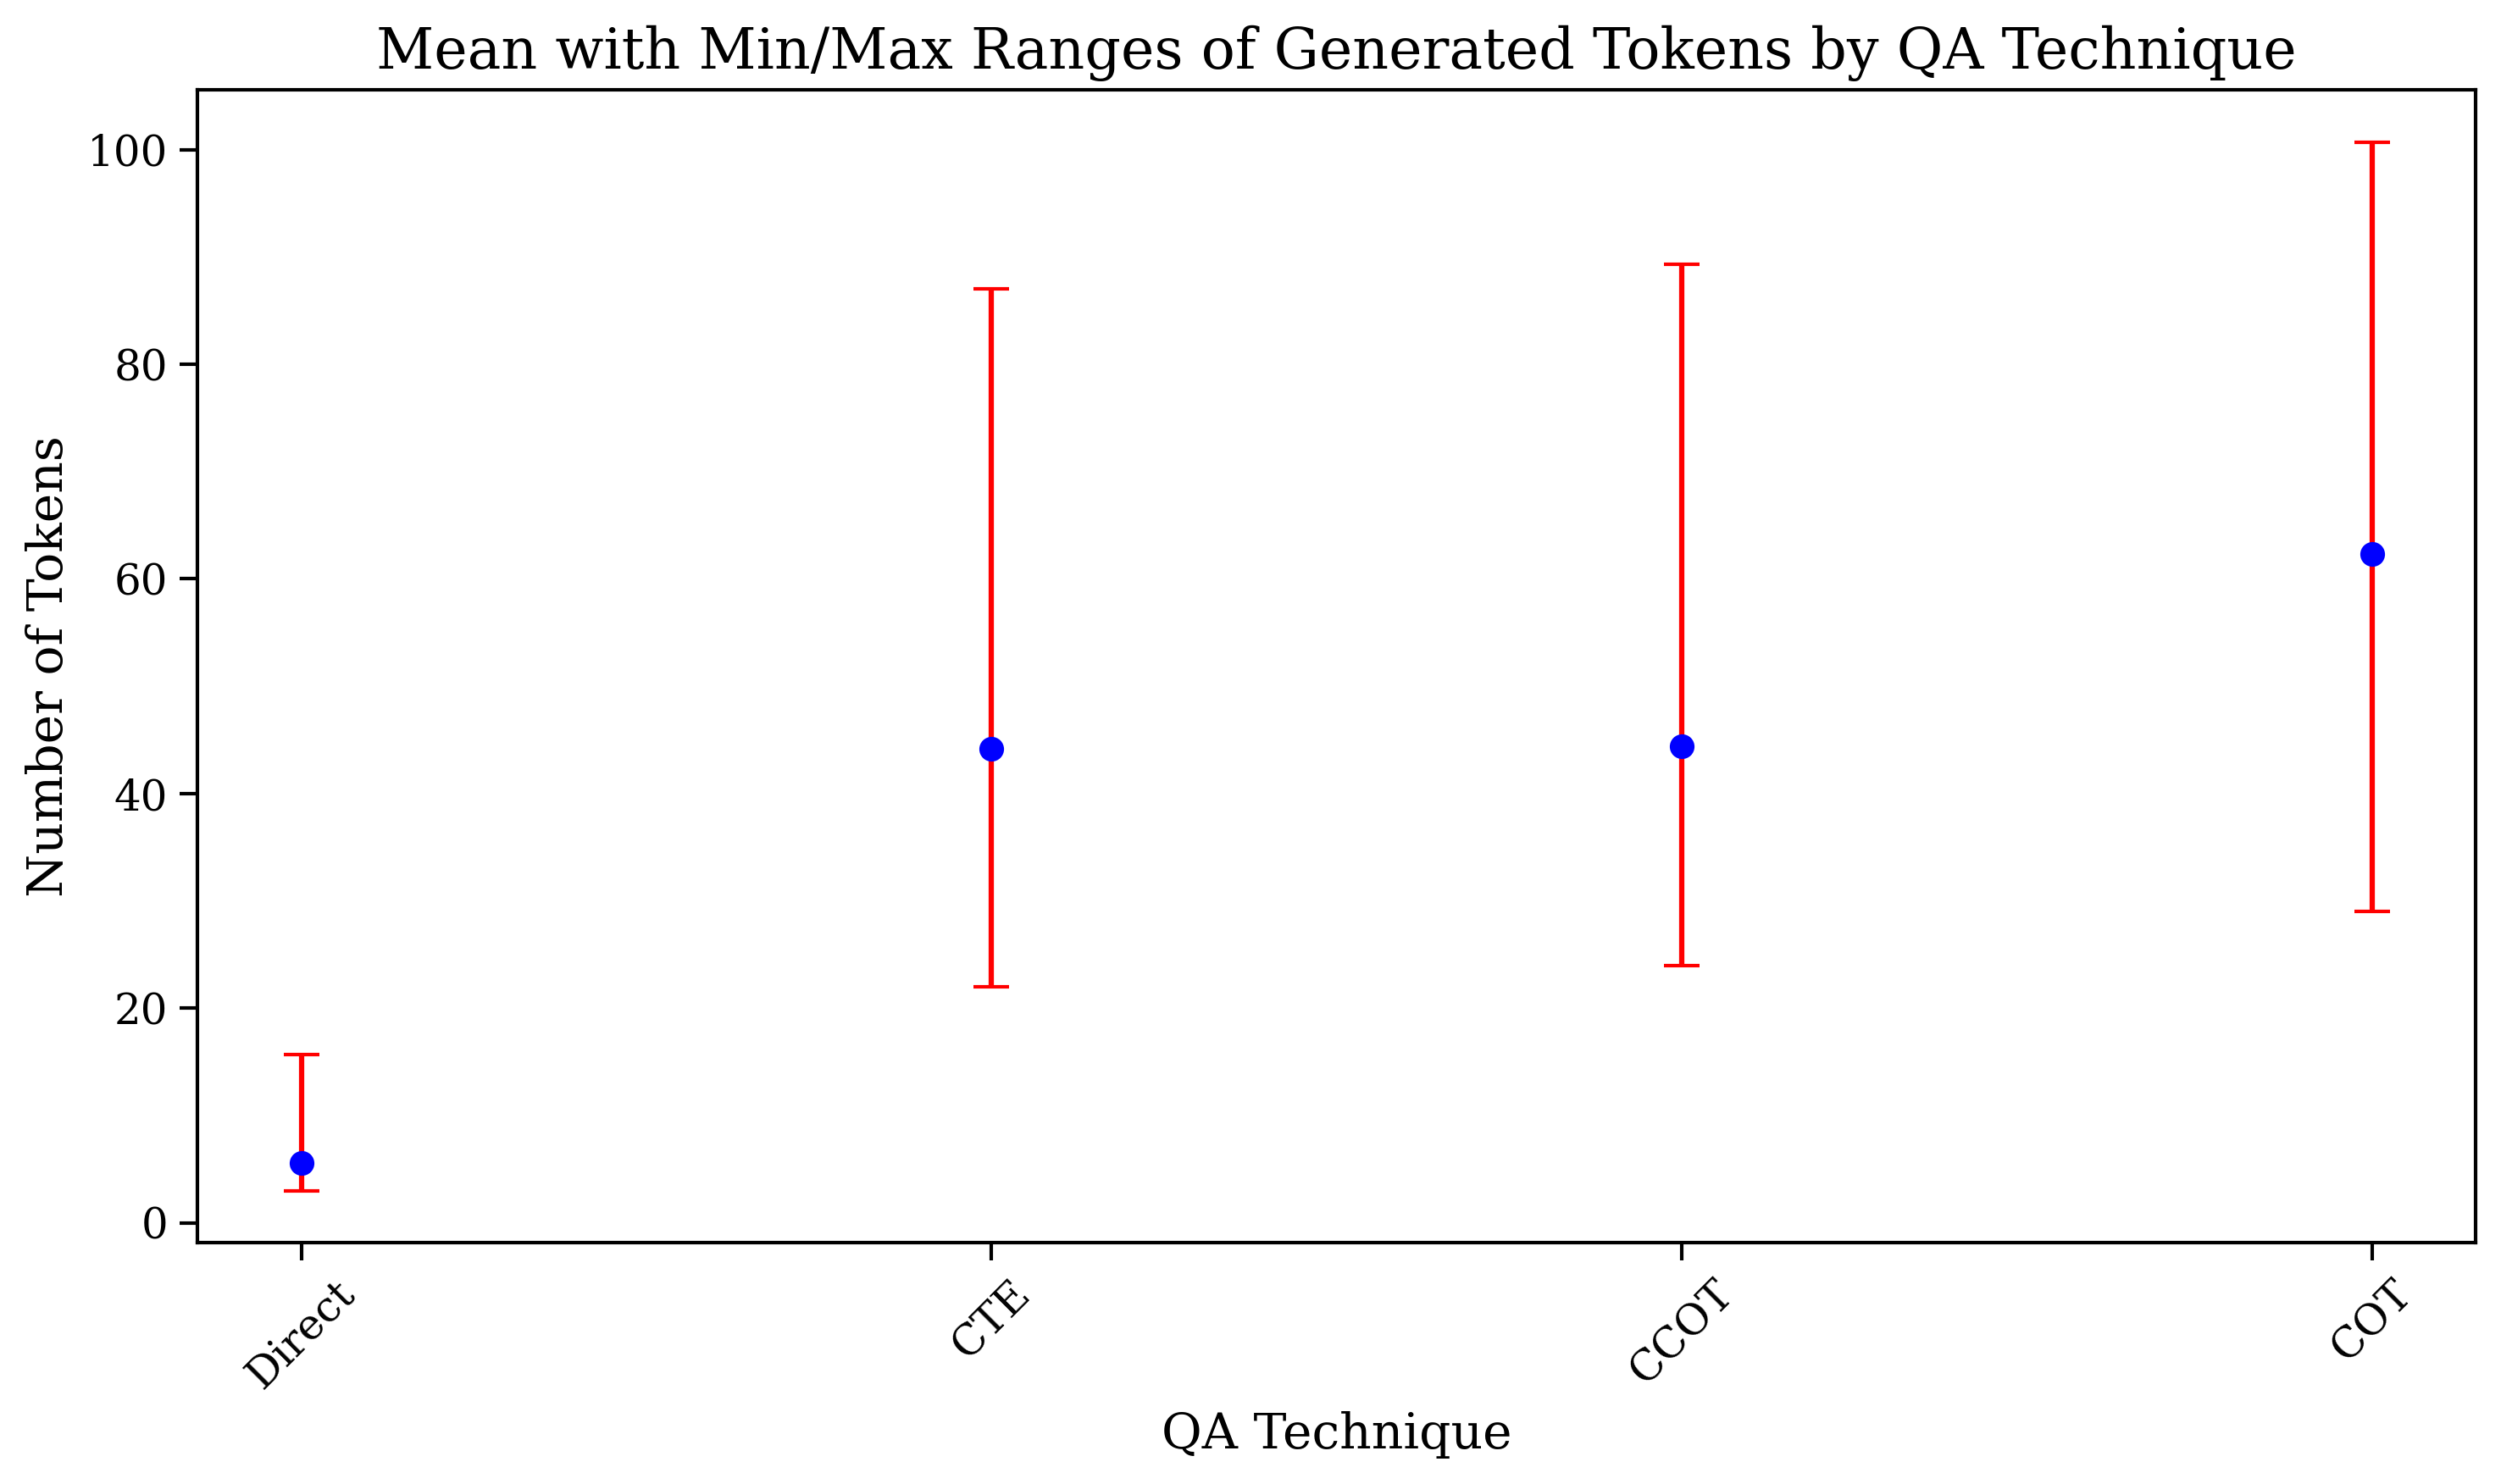

In [26]:
plt.figure(figsize=(10, 6))
plt.errorbar(data["Technique"], data["Mean Tokens"], 
             yerr=[data["Mean Tokens"] - data["Min Tokens"], data["Max Tokens"] - data["Mean Tokens"]],
             fmt='o', capsize=5, ecolor='red', color='blue')
plt.title("Mean with Min/Max Ranges of Generated Tokens by QA Technique")
plt.xlabel("QA Technique")
plt.ylabel("Number of Tokens")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


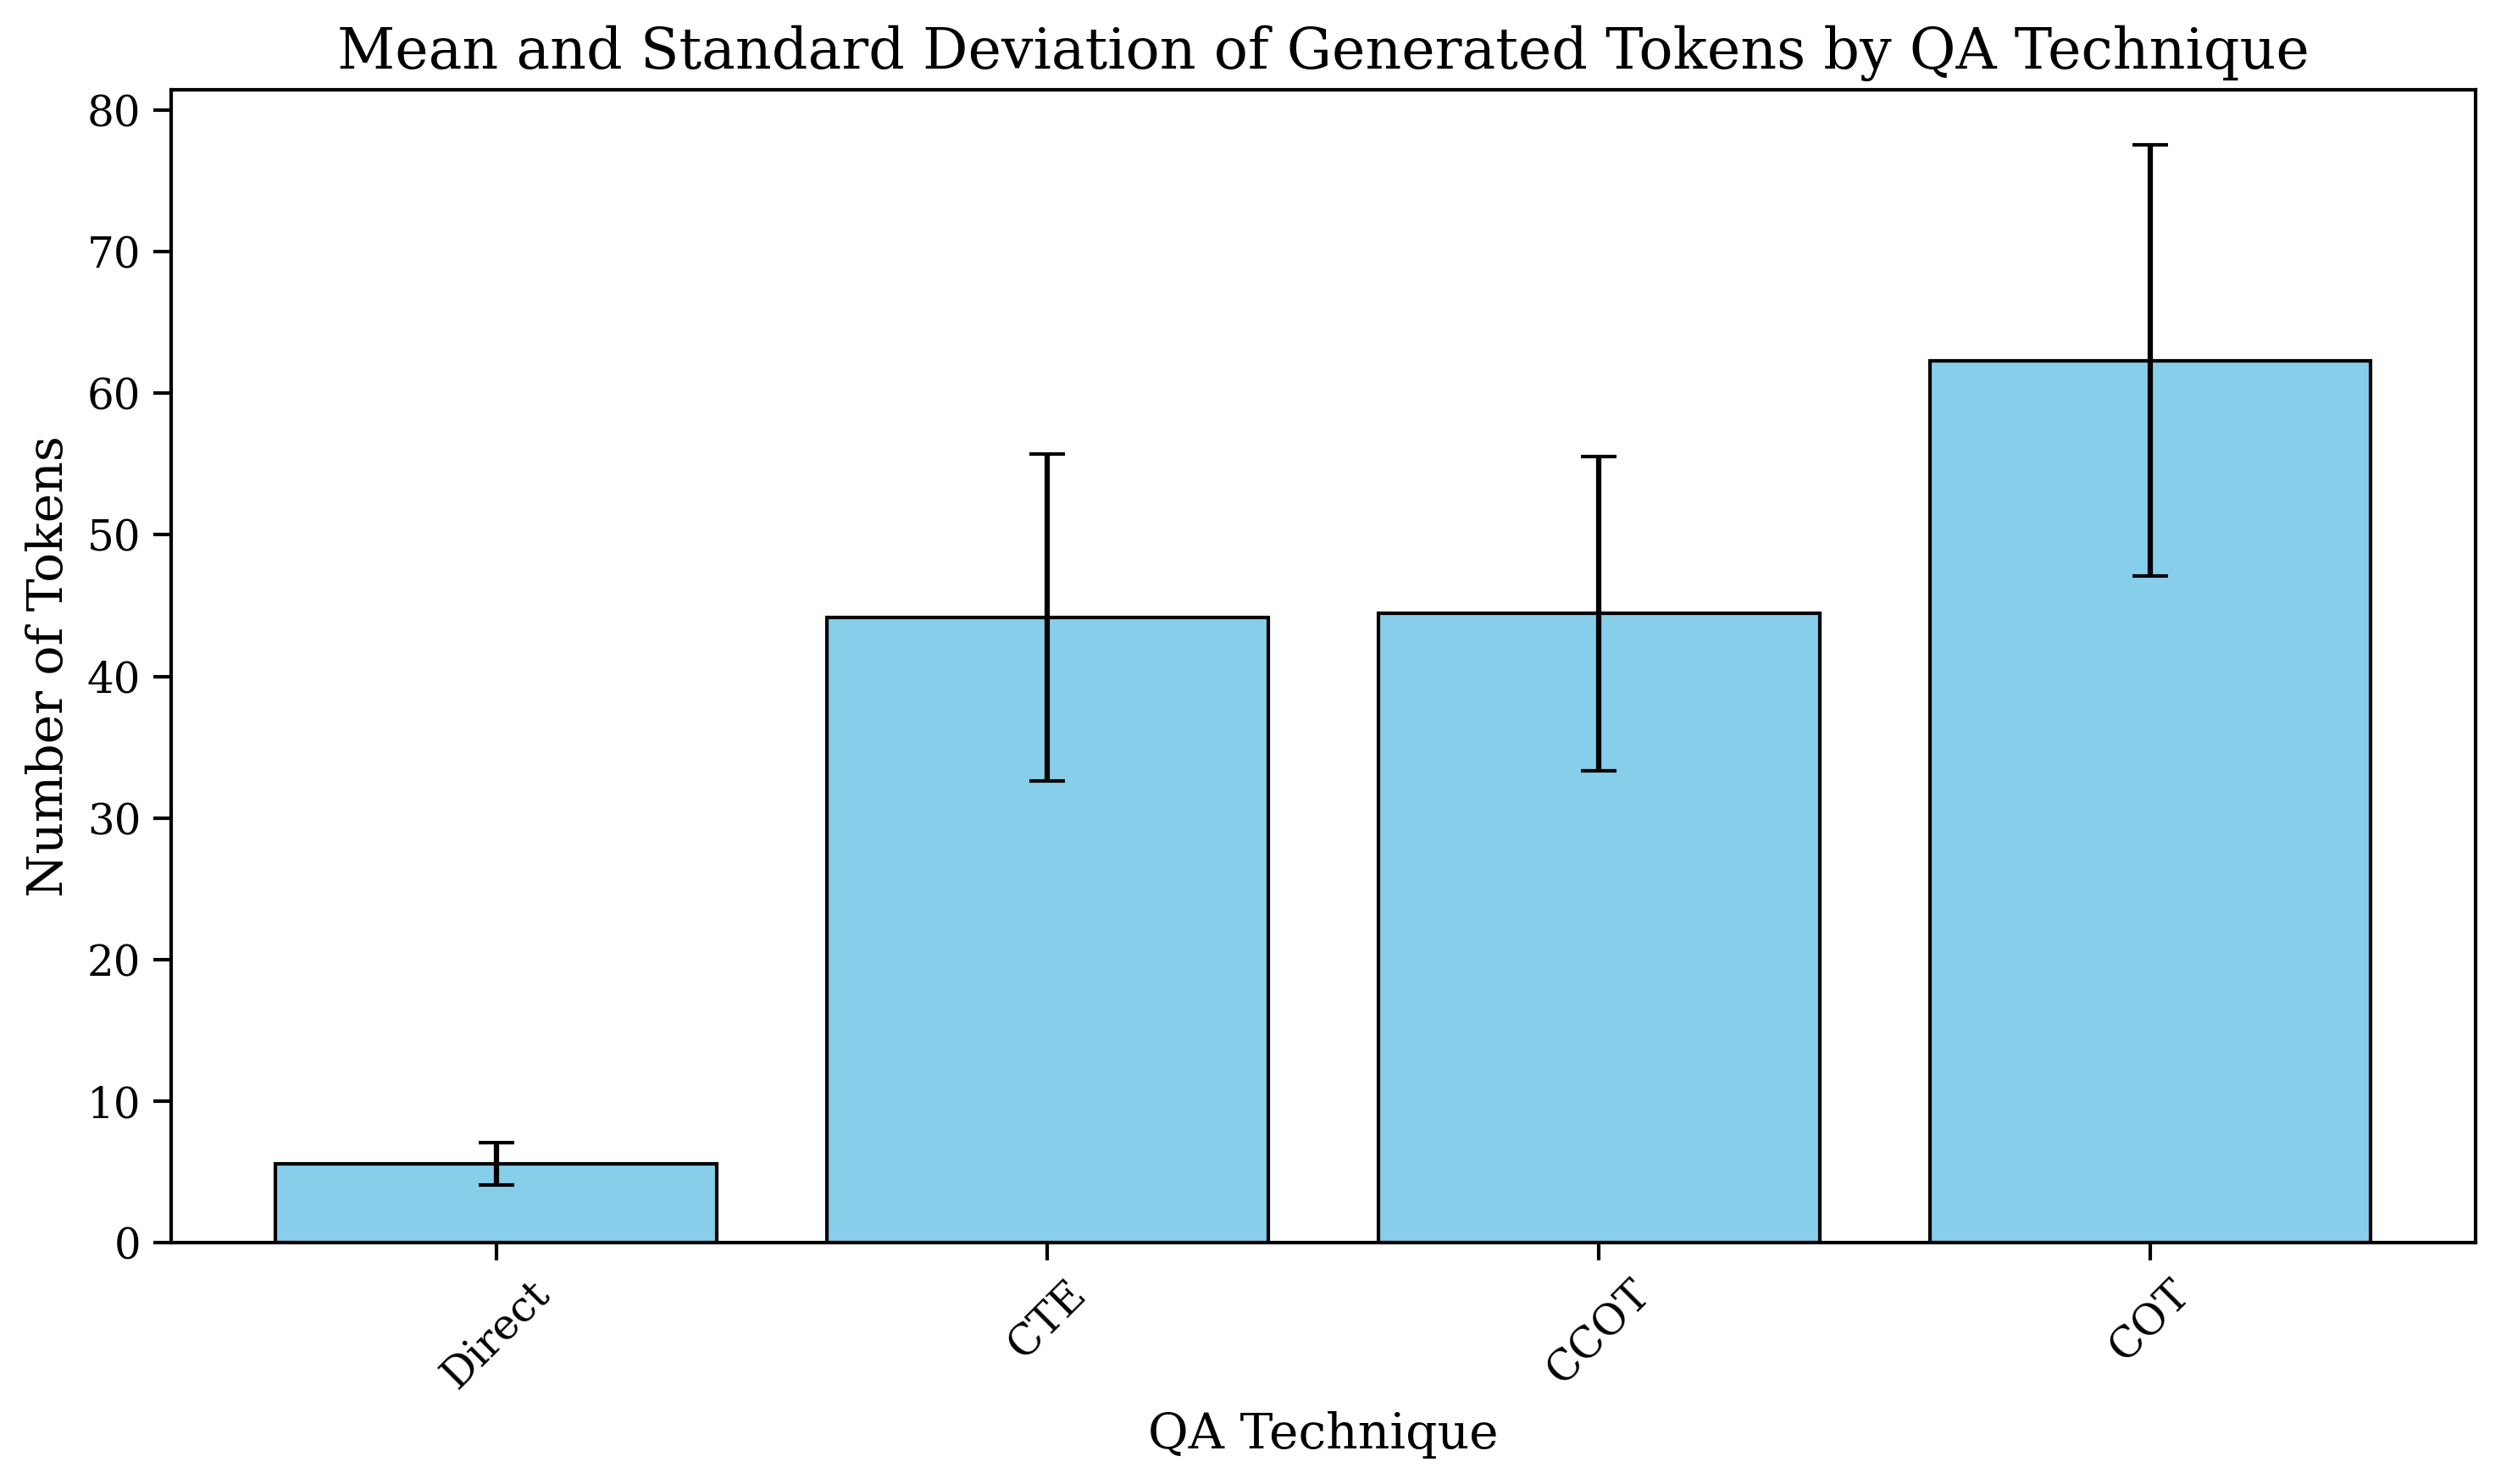

In [27]:
# Create a bar plot with error bars
plt.figure(figsize=(10, 6))
plt.bar(data["Technique"], data["Mean Tokens"], 
        yerr=data["Std Tokens"], capsize=5, 
        color='skyblue', edgecolor='black')
plt.title("Mean and Standard Deviation of Generated Tokens by QA Technique")
plt.xlabel("QA Technique")
plt.ylabel("Number of Tokens")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


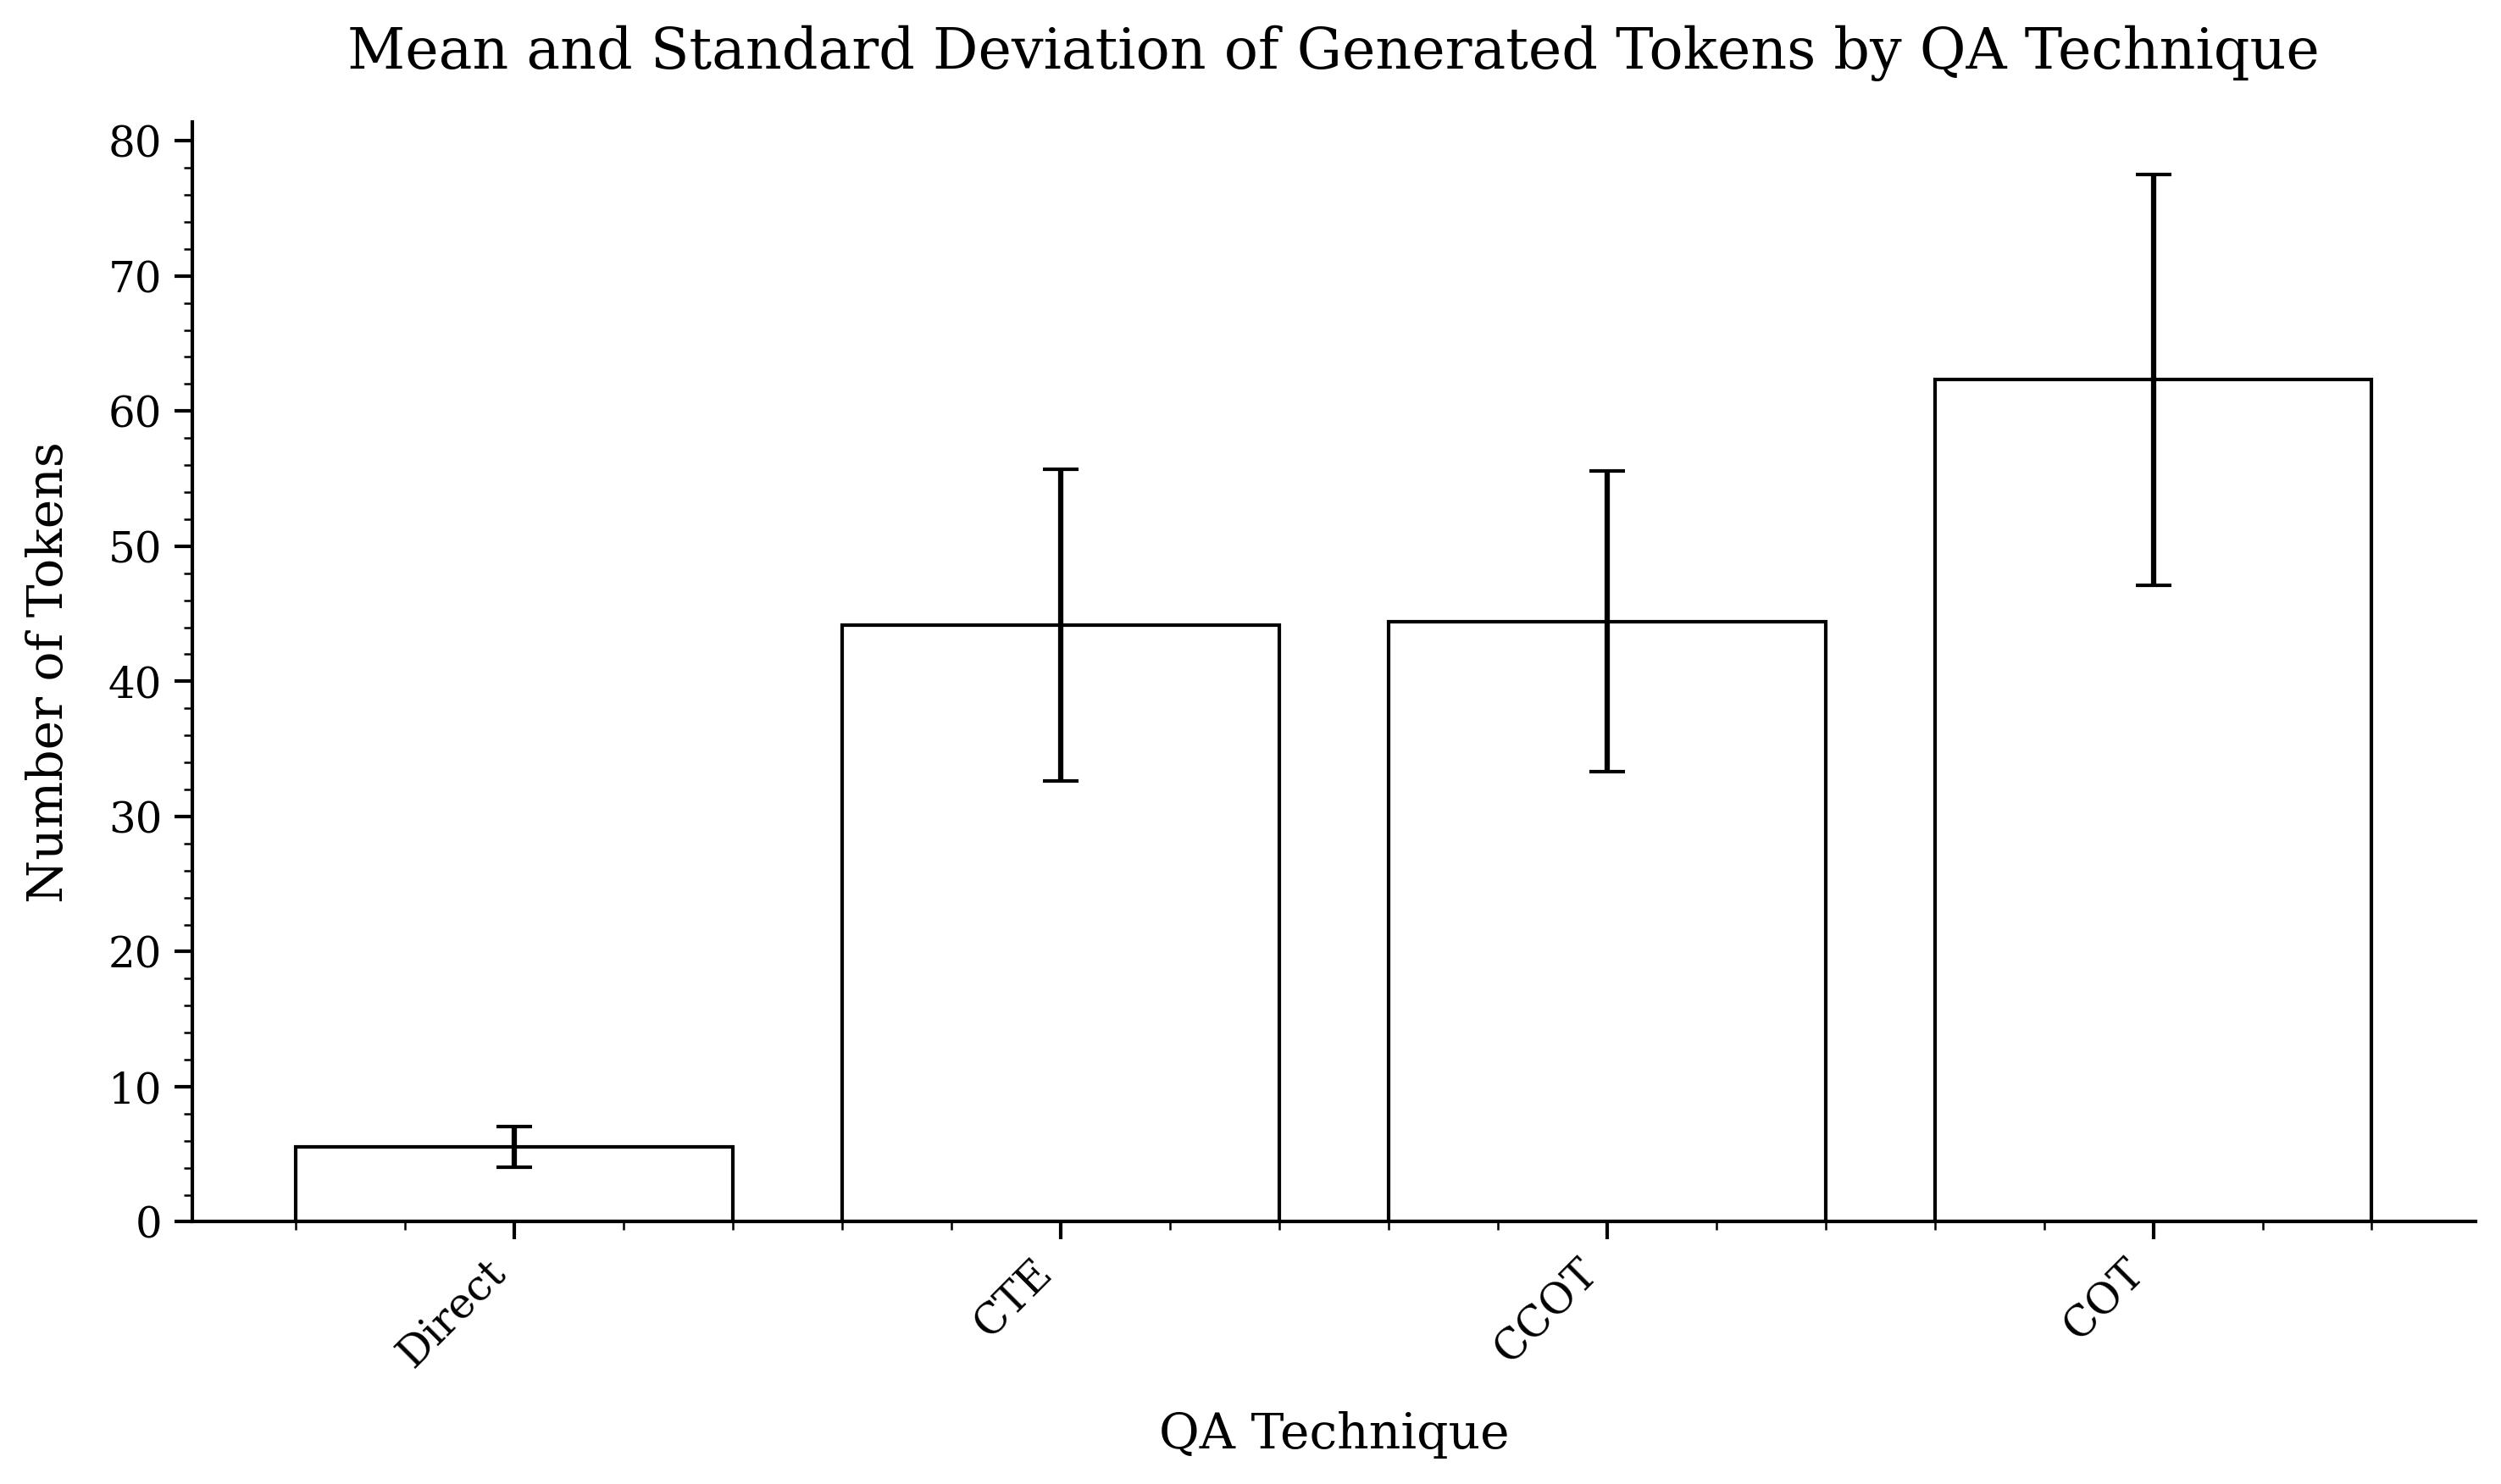

In [28]:
# Create a bar plot with error bars
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(data["Technique"], data["Mean Tokens"], 
              yerr=data["Std Tokens"], capsize=5, 
              color='white', edgecolor='black', linewidth=1)

# Set titles and labels with appropriate font sizes
ax.set_title("Mean and Standard Deviation of Generated Tokens by QA Technique", pad=15)
ax.set_xlabel("QA Technique", labelpad=10)
ax.set_ylabel("Number of Tokens", labelpad=10)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Enable minor ticks for additional precision
ax.minorticks_on()

# Adjust layout for publication quality
plt.tight_layout()

# Show or save the figure as needed (e.g., plt.savefig("figure.png"))
plt.show()


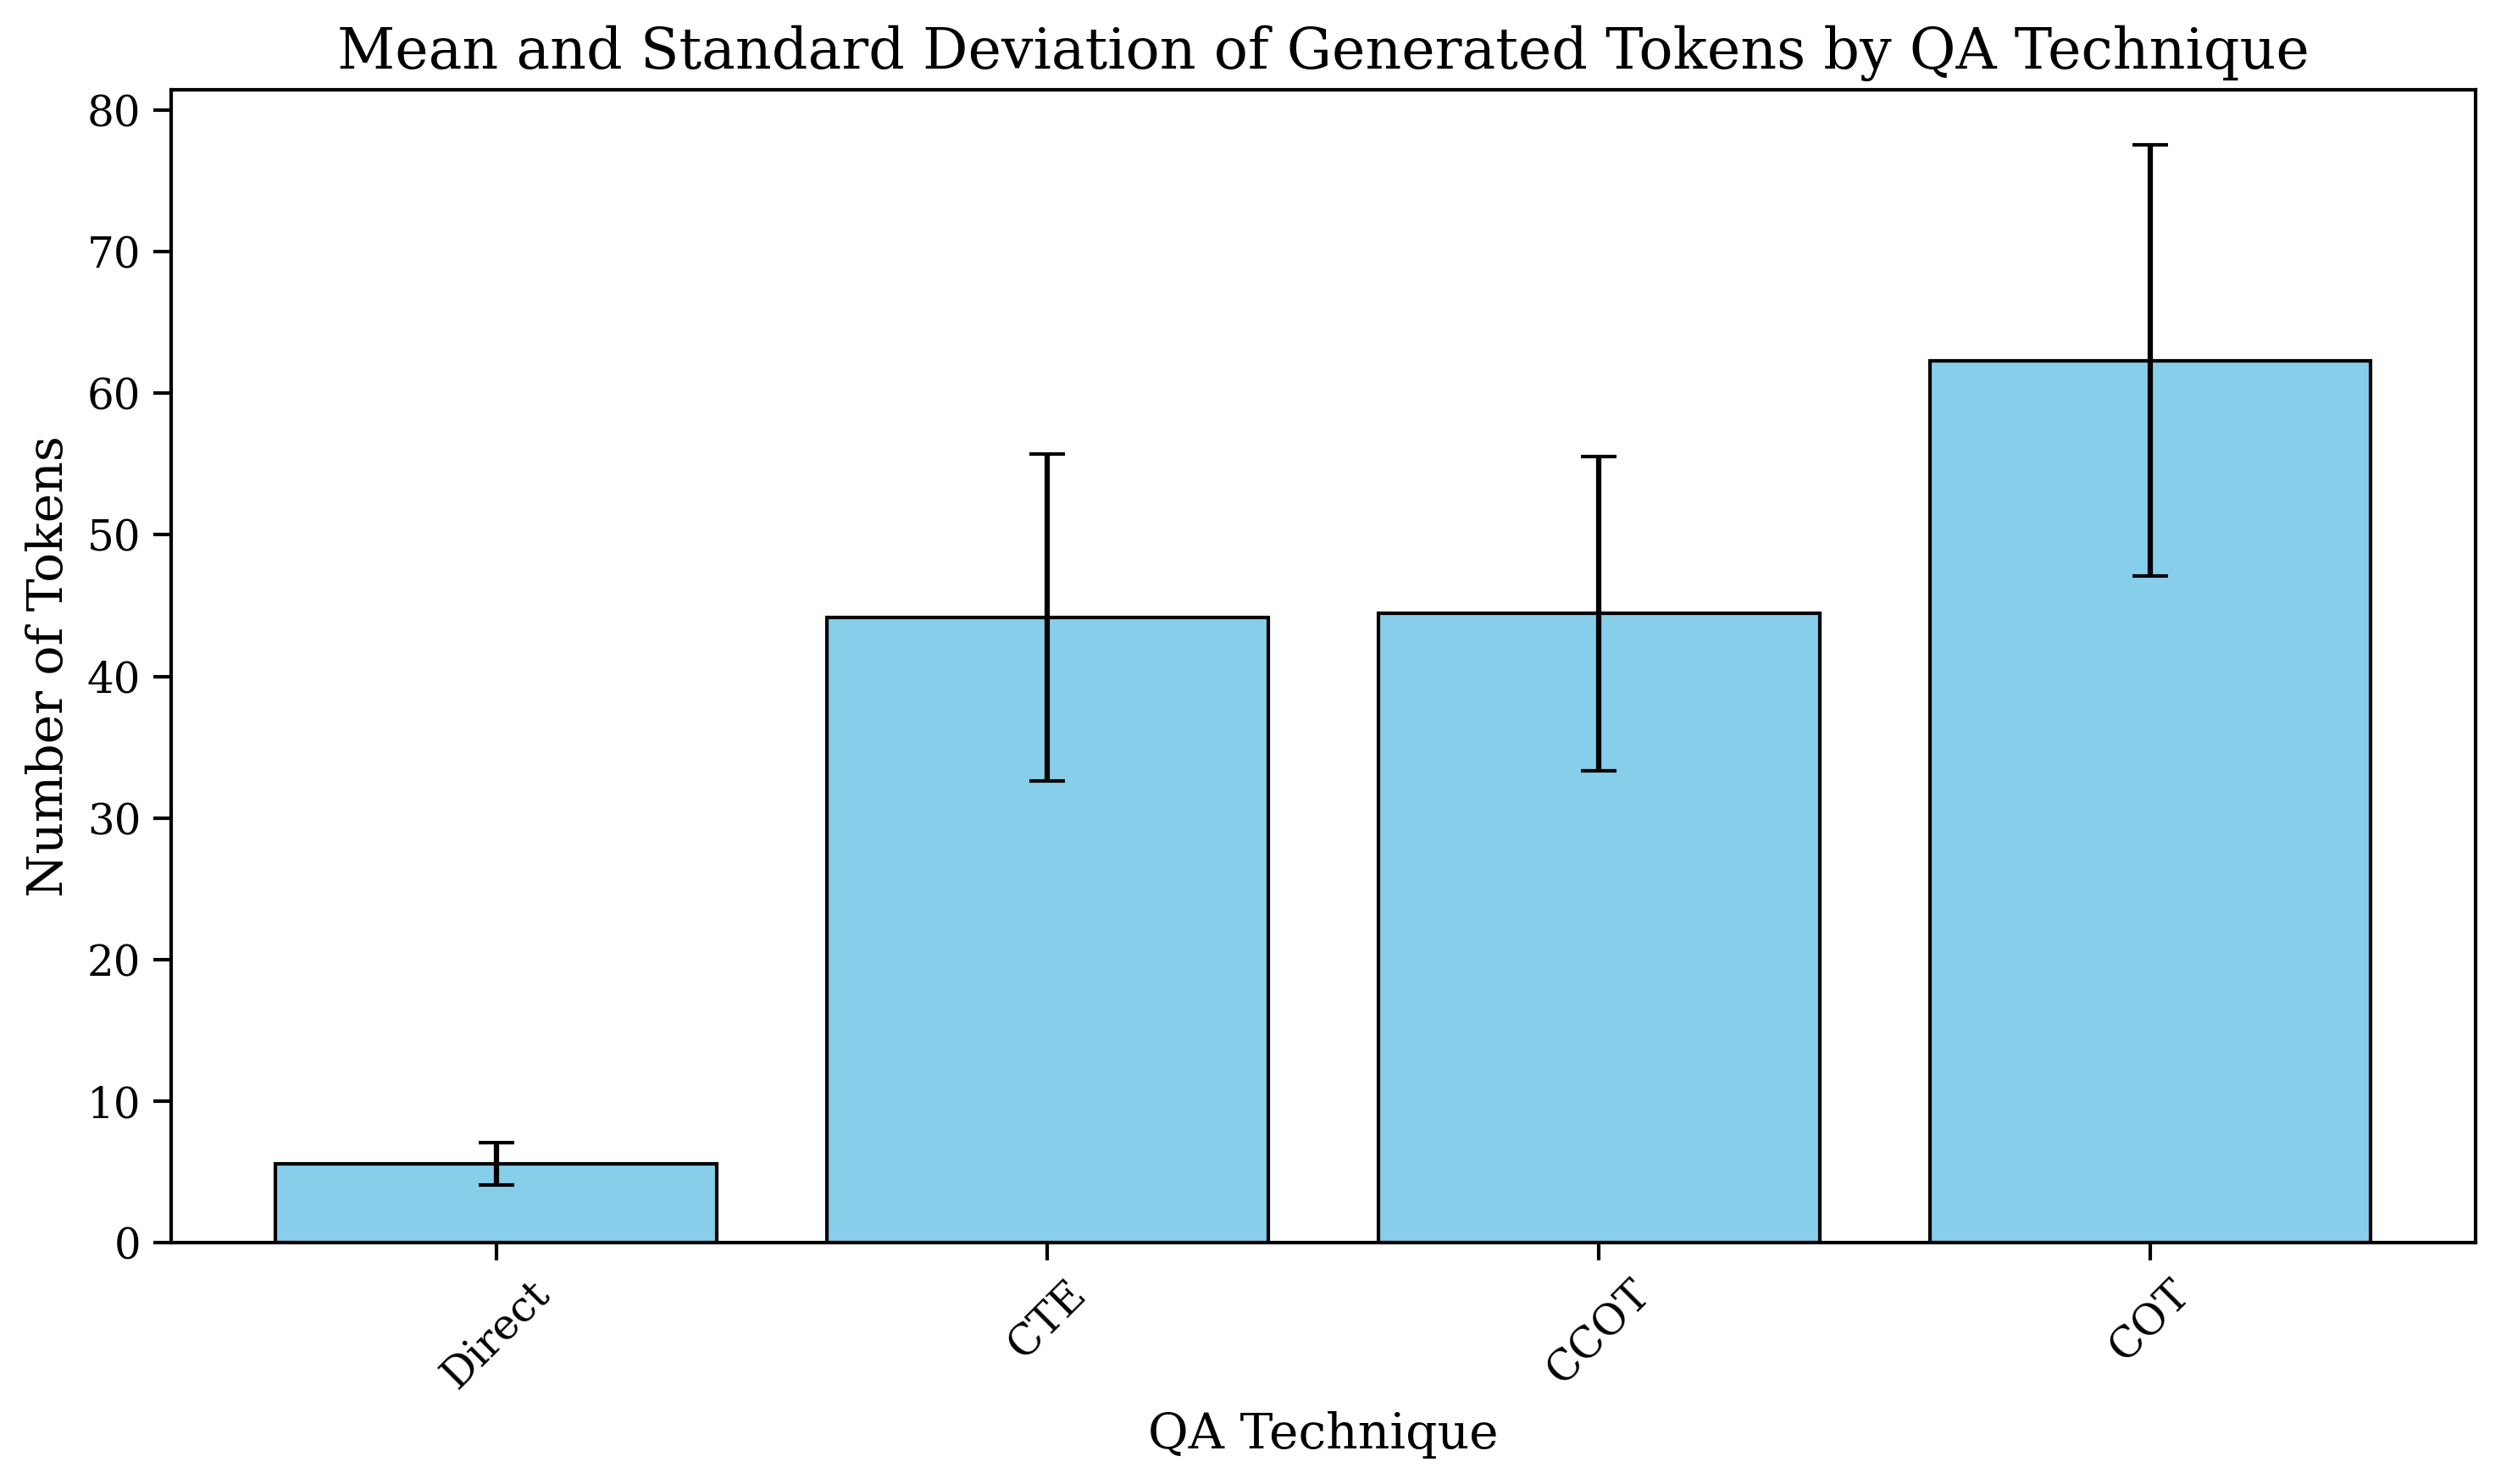

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(data["Technique"], data["Mean Tokens"], 
        yerr=data["Std Tokens"], capsize=5, 
        color='skyblue', edgecolor='black')
plt.title("Mean and Standard Deviation of Generated Tokens by QA Technique")
plt.xlabel("QA Technique")
plt.ylabel("Number of Tokens")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


([0, 1, 2, 3],
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'CTE'),
  Text(2, 0, 'CCOT'),
  Text(3, 0, 'COT')])

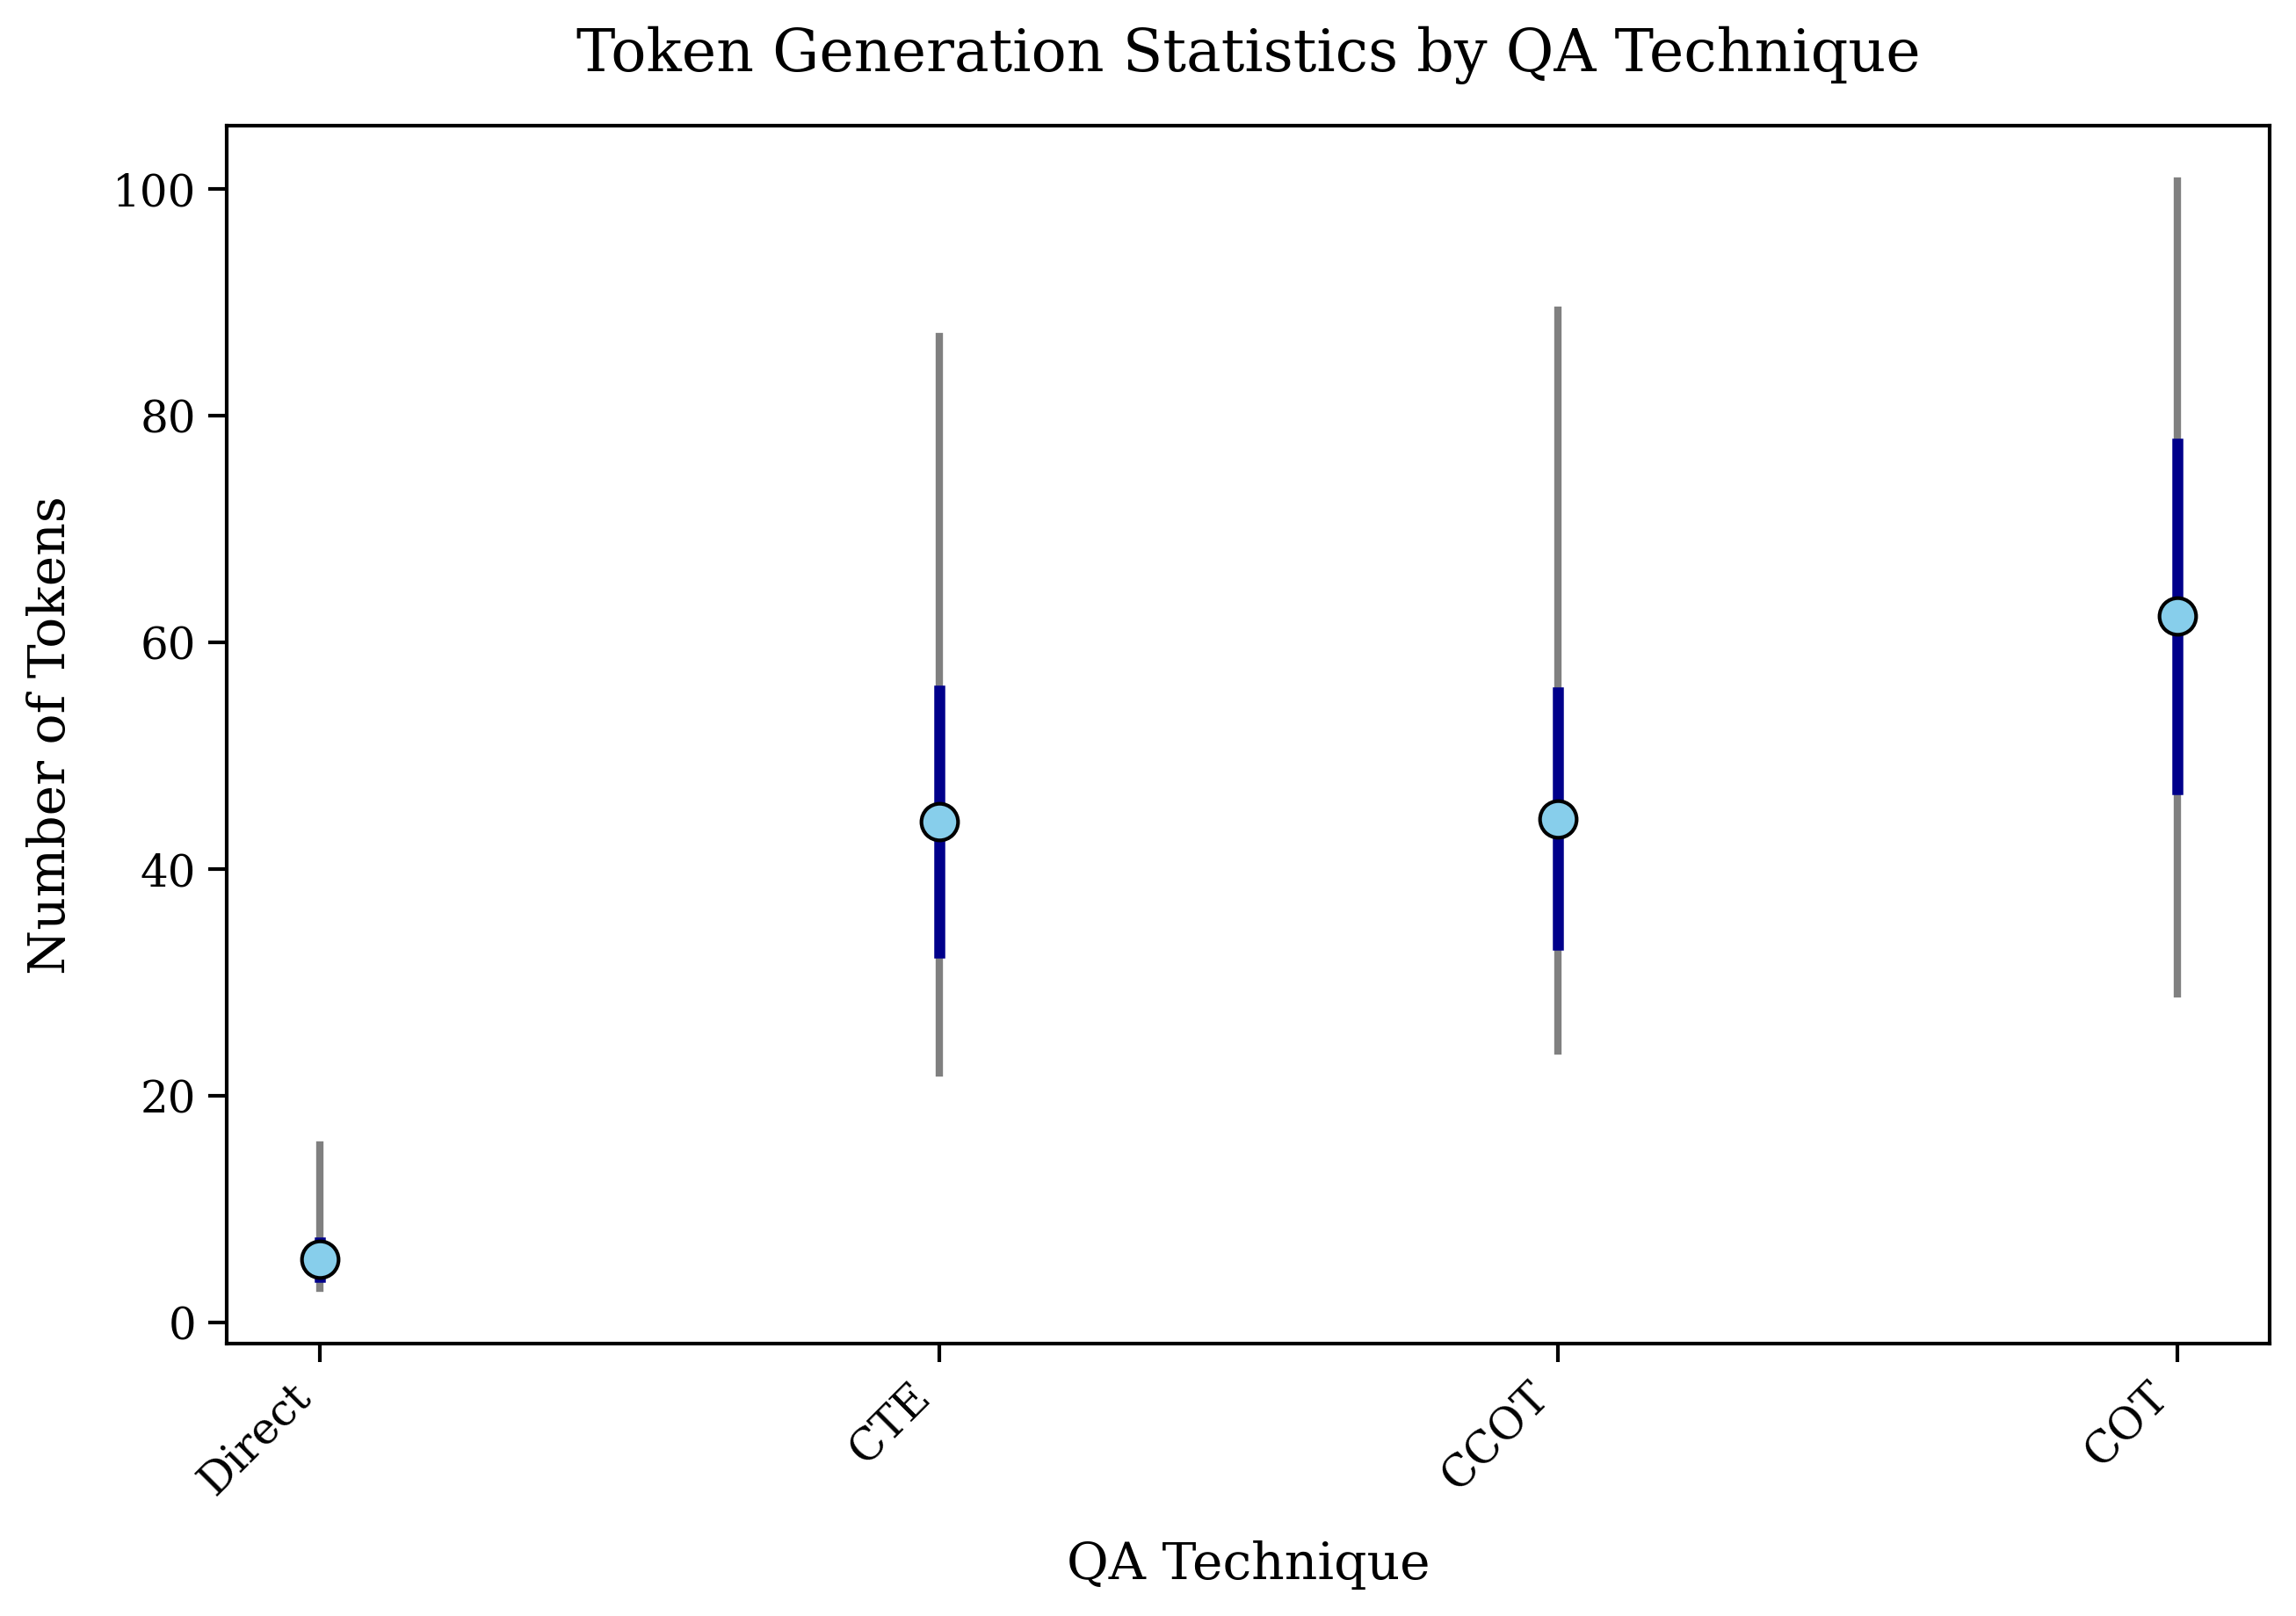

In [30]:
# Create the lollipop chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a vertical line for each technique from min to max
for idx, row in data.iterrows():
    ax.plot([row["Technique"], row["Technique"]], [row["Min Tokens"], row["Max Tokens"]],
            color='grey', lw=2, zorder=1)

# Plot mean points with error bars (mean ± std) as small horizontal ticks
for idx, row in data.iterrows():
    # Vertical line for std range centered on the mean
    ax.plot([row["Technique"], row["Technique"]],
            [row["Mean Tokens"] - row["Std Tokens"], row["Mean Tokens"] + row["Std Tokens"]],
            color='darkblue', lw=3, zorder=2)
    # Marker at the mean
    ax.scatter(row["Technique"], row["Mean Tokens"], 
               color='skyblue', edgecolor='black', s=100, zorder=3)

# Set titles and labels
ax.set_title("Token Generation Statistics by QA Technique", pad=15)
ax.set_xlabel("QA Technique", labelpad=10)
ax.set_ylabel("Number of Tokens", labelpad=10)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Remove top and right


/tmp/ipykernel_156122/693157504.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Technique", y="Token Count", data=synthetic_df, palette="pastel", inner="quartile")


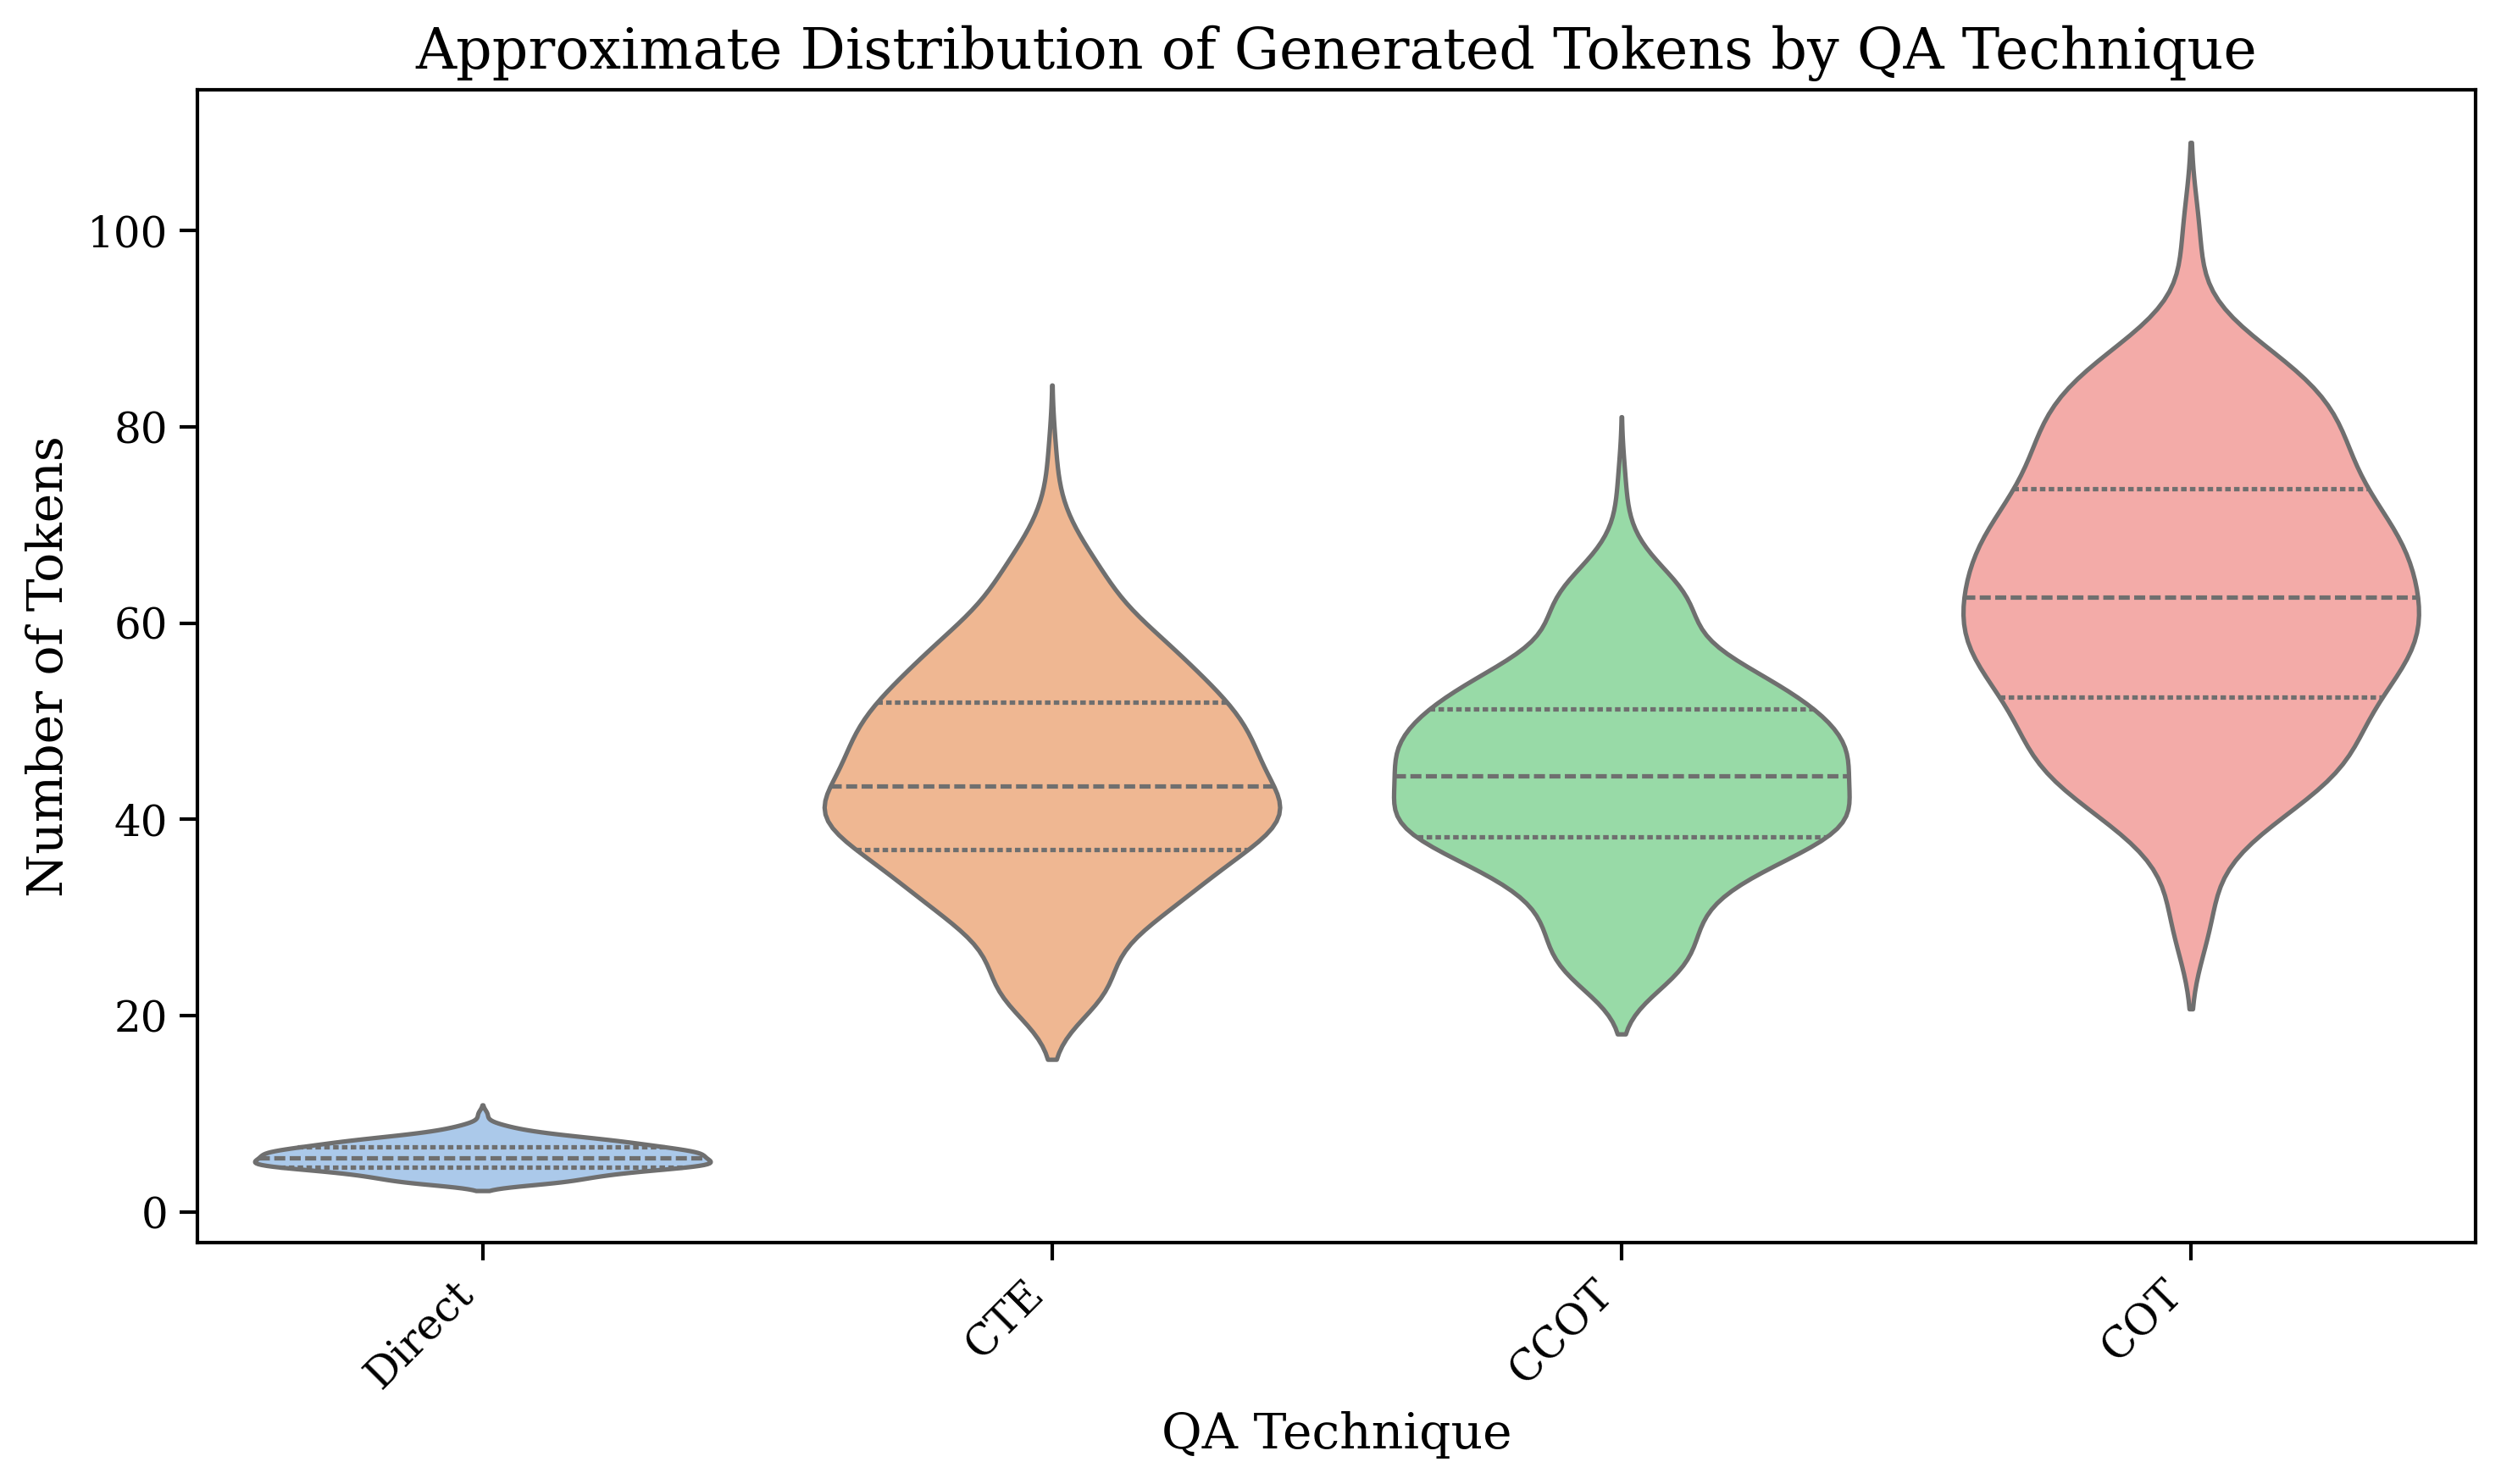

In [31]:
# Create synthetic data assuming normal distribution for each technique
synthetic_data = []
for _, row in data.iterrows():
    # Generate 500 sample points from a normal distribution with given mean and std
    samples = np.random.normal(loc=row["Mean Tokens"], scale=row["Std Tokens"], size=500)
    # Clip to min and max bounds
    samples = np.clip(samples, row["Min Tokens"], row["Max Tokens"])
    synthetic_data.extend(zip([row["Technique"]]*len(samples), samples))

# Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=["Technique", "Token Count"])

# Plot violin plot using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x="Technique", y="Token Count", data=synthetic_df, palette="pastel", inner="quartile")
plt.title("Approximate Distribution of Generated Tokens by QA Technique")
plt.xlabel("QA Technique")
plt.ylabel("Number of Tokens")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


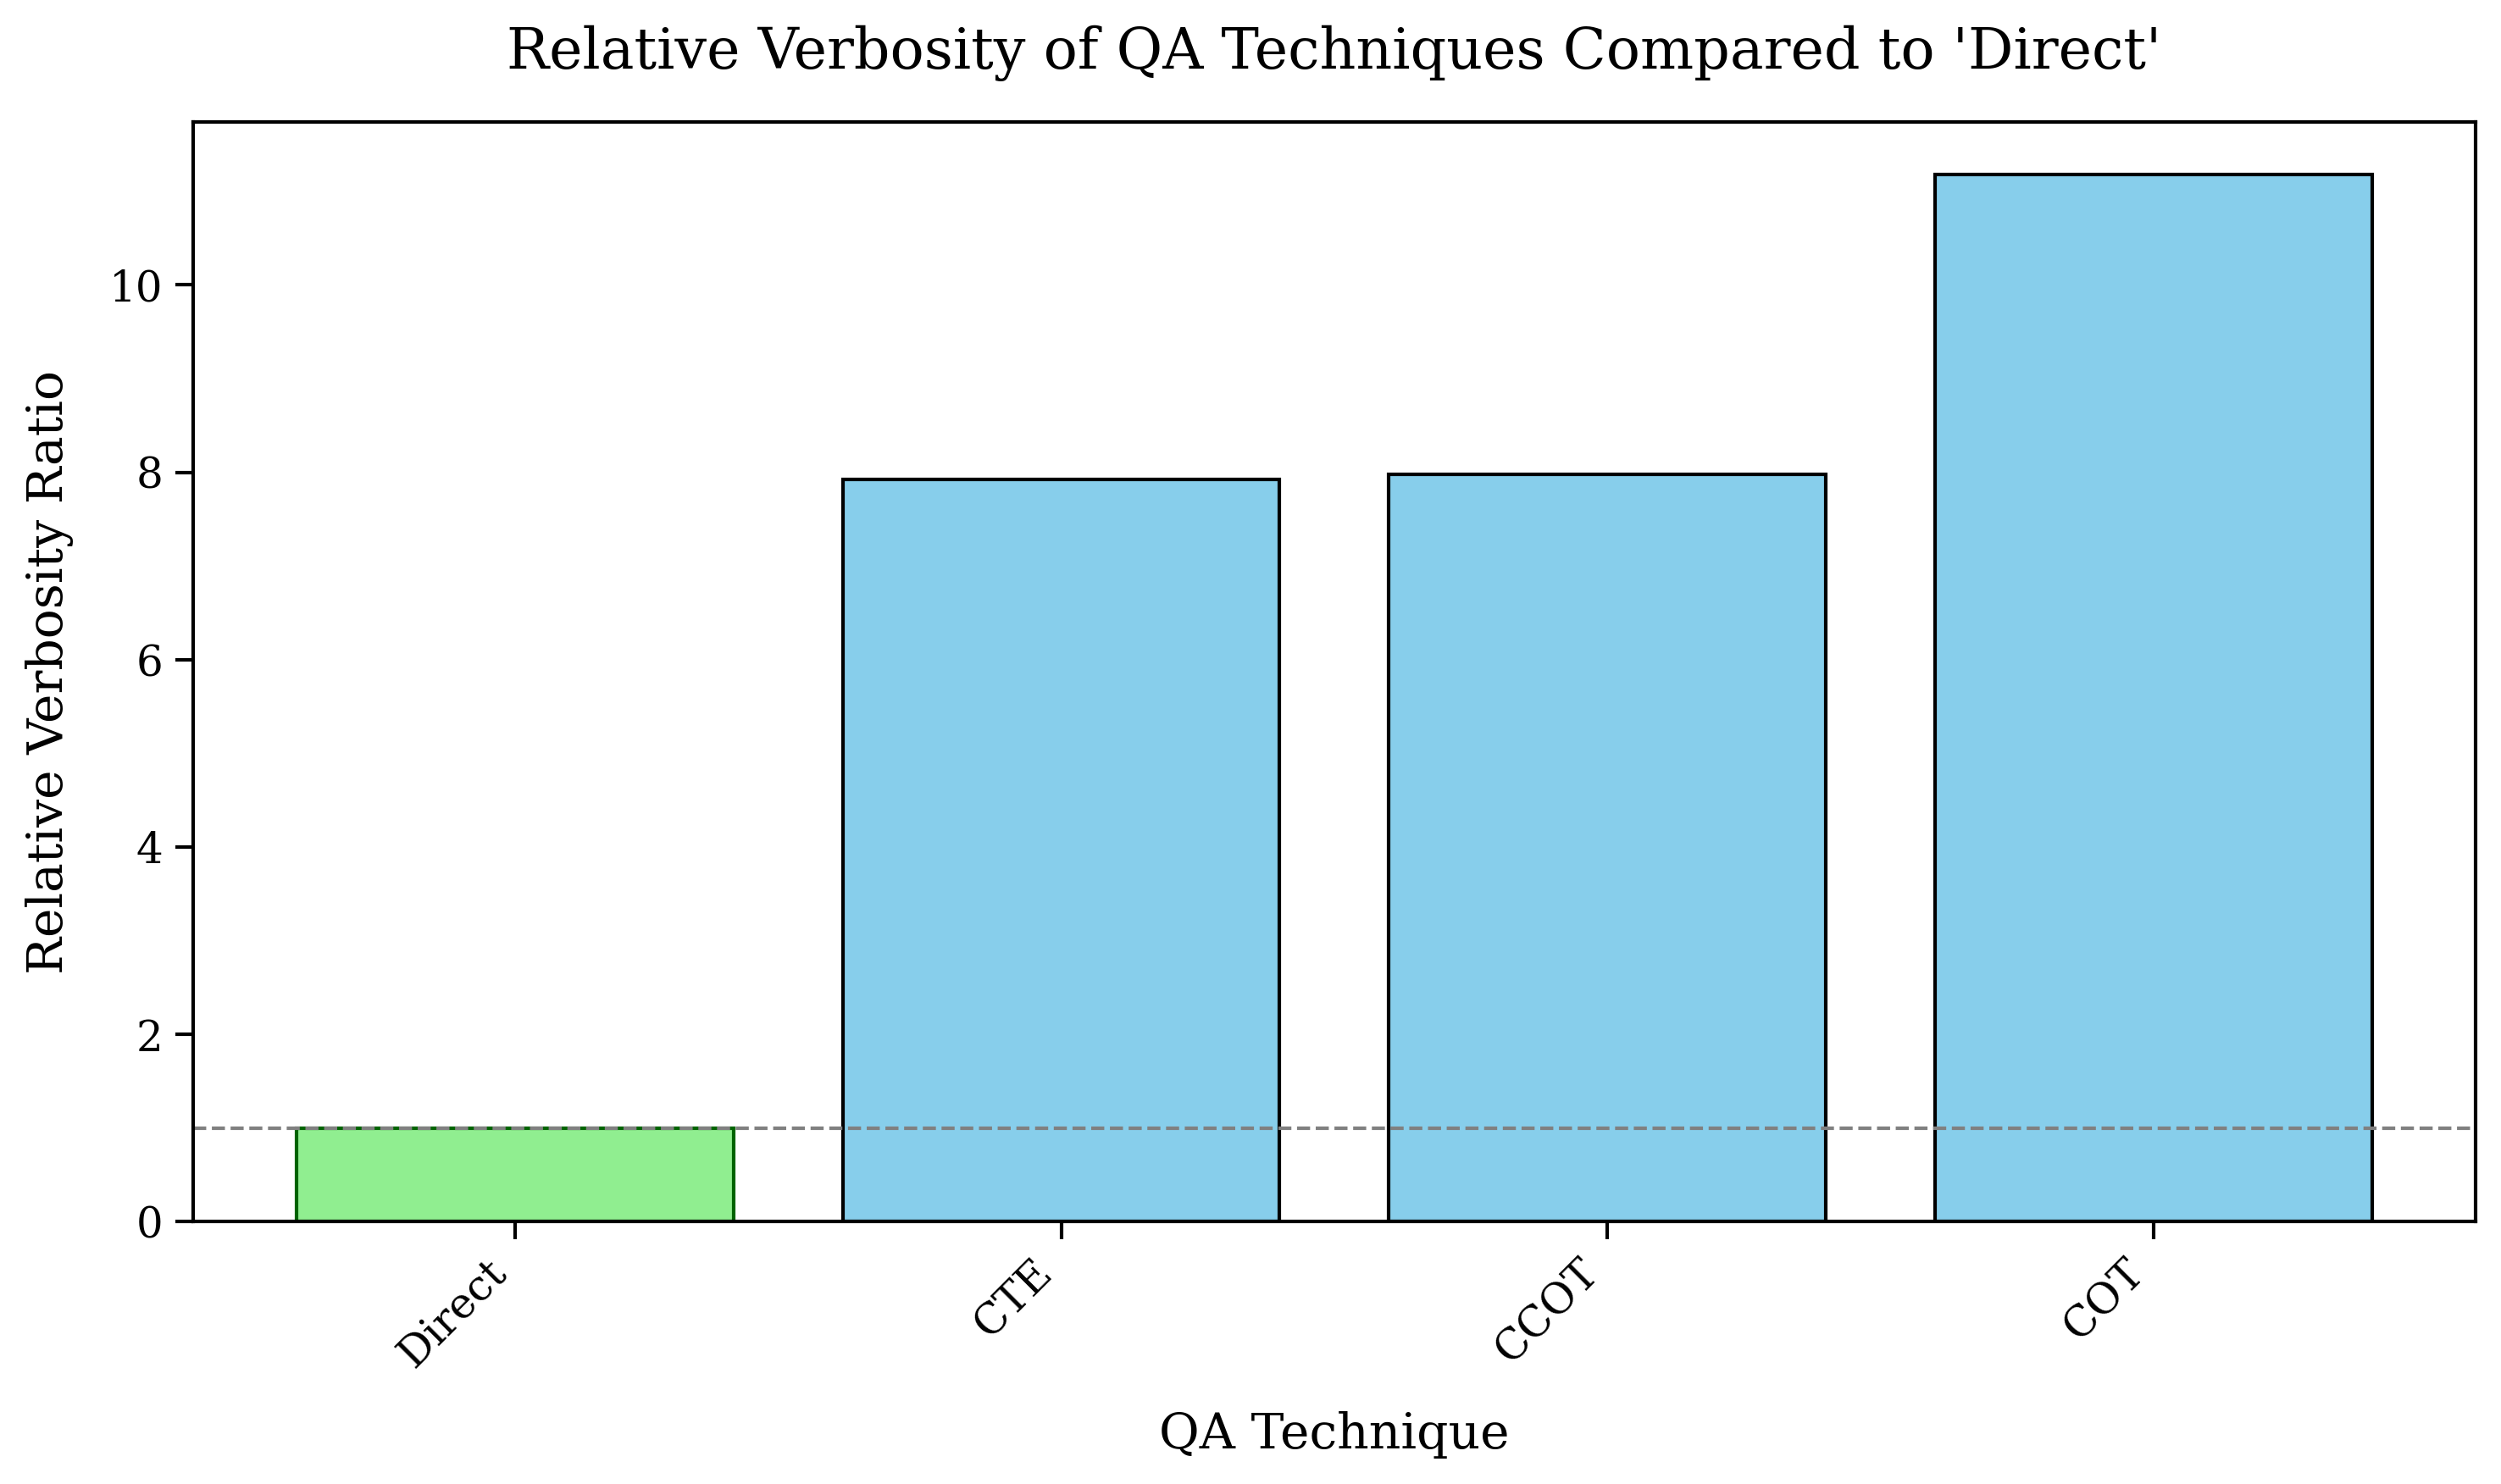

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(
    data["Technique"], 
    data["Relative Verbosity Ratio"], 
    color='skyblue', 
    edgecolor='black', 
    linewidth=1
)

# Highlight the Direct technique bar (which should have a ratio of 1.0)
for bar, tech in zip(bars, data["Technique"]):
    if tech == "Direct":
        bar.set_color('lightgreen')
        bar.set_edgecolor('darkgreen')

# Add a horizontal reference line at ratio = 1
ax.axhline(1, color='grey', linestyle='--', linewidth=1)

# Set titles and labels
ax.set_title("Relative Verbosity of QA Techniques Compared to 'Direct'", pad=15)
ax.set_xlabel("QA Technique", labelpad=10)
ax.set_ylabel("Relative Verbosity Ratio", labelpad=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
